In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import seaborn as sns
from itertools import product
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [2]:
import pandas as pd 
df_train = pd.read_csv('/Users/shivangeeacharya/Downloads/Data_Science_Project/creditcard_train.csv')
df_test = pd.read_csv('/Users/shivangeeacharya/Downloads/Data_Science_Project/creditcard_test.csv')
df = df_train
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,33419.0,-2.178201,-3.132187,1.315758,-0.129783,-2.736013,0.743459,-0.752718,-2.650826,-0.184284,...,-0.828762,-0.219136,-1.004913,0.788588,1.061994,-0.319407,-0.132313,0.333476,937.75,0
1,151317.0,2.064423,0.185575,-1.684612,0.411066,0.479555,-0.797963,0.205544,-0.240568,0.415454,...,-0.351331,-0.876025,0.343288,0.522189,-0.259568,0.173623,-0.056280,-0.029665,1.98,0
2,132434.0,-0.547505,0.798072,-0.719939,-1.129561,0.925708,0.763338,0.231338,0.799204,-0.277812,...,0.366664,1.068933,-0.101523,-1.604148,-0.318277,0.838076,0.012324,-0.015564,11.95,0
3,81787.0,-0.945710,0.323579,0.595681,-1.288095,0.818906,-0.748491,0.890076,-0.130671,-0.471365,...,-0.371528,-1.149510,0.217859,-0.507989,-0.026857,0.591496,-0.326179,-0.007543,24.98,0
4,125062.0,1.898722,-0.321038,-1.771837,0.672408,0.115019,-1.267347,0.612810,-0.441070,0.450298,...,0.015111,0.006269,-0.029094,-0.071333,0.179444,0.378225,-0.106042,-0.059506,104.36,0


In [ ]:
X = df[df.columns[:-1]].values
y = df['Class'].values
ax = plt.gca()
plot_decision_function(X[:, :2][:1000], y[:1000], LinearSVC().fit(X[:, :2][:5000], y[:5000]), ax)

In [6]:
X_test_df_test, Y_test_df_test = df_test.drop('Class', axis=1), df_test['Class']
print(X_test_df_test.shape)
print(Y_test_df_test.shape)

(85443, 30)
(85443,)


In [ ]:
ax1 = plt.gca()
plot_decision_function(X_test_df_test[:, :2][:1000], Y_test_df_test[:1000], LinearSVC().fit(X_test_df_test[:, :2][:5000], Y_test_df_test[:5000]), ax1)

In [4]:
rus = RandomUnderSampler(random_state=0)
resampled_X, resampled_Y = rus.fit_resample(df.drop('Class', axis=1), df['Class'])
undersampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
undersampled_df.columns = df.columns
undersampled_df['Class'].value_counts()

1    364
0    364
Name: Class, dtype: int64

In [ ]:
rus = RandomUnderSampler(random_state=0)
resampled_X_df_test, resampled_Y_df_test = rus.fit_resample(df_test.drop('Class', axis=1), df_test['Class'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_Y, train_size=0.8, random_state=0)
X_train_df_test, X_test_df_test, y_train_df_test, y_test_df_test = train_test_split(resampled_X_df_test, resampled_Y_df_test, train_size=0.8, random_state=0)

In [ ]:
ax3 = plt.gca()
plot_decision_function(resampled_X[:, :2][:1000], resampled_Y[:1000], LinearSVC().fit(resampled_X[:, :2][:5000], resampled_Y[:5000]), ax3)

In [ ]:
ax4 = plt.gca()
plot_decision_function(resampled_X_df_test[:, :2][:1000], resampled_Y_df_test[:1000], LinearSVC().fit(resampled_X_df_test[:, :2][:5000], resampled_Y_df_test[:5000]), ax1)

In [ ]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(resampled_X[:, 0], resampled_X[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("Random Under Sampler Output ($n_{class}=4700)$")
pass

In [7]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(resampled_X, resampled_Y)
# Get model performance metrics
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        73
           1       0.95      0.85      0.90        73

    accuracy                           0.90       146
   macro avg       0.91      0.90      0.90       146
weighted avg       0.91      0.90      0.90       146



In [10]:
# X_test_df_test, Y_test_df_test = df_test.drop('Class', axis=1), df_test['Class']
# print(X_test_df_test.shape)
# print(Y_test_df_test.shape)


model = LogisticRegression()
model.fit(resampled_X_df_test, resampled_Y_df_test)

predicted_df_test = model.predict(X_test_df_test)
print(classification_report(Y_test_df_test, predicted_df_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85315
           1       0.02      0.90      0.04       128

    accuracy                           0.93     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.93      0.96     85443



In [9]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(resampled_X, resampled_Y)

predicted_df_test_from_train = model.predict(X_test_df_test)
print(classification_report(Y_test_df_test, predicted_df_test_from_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85315
           1       0.03      0.88      0.06       128

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [13]:
model = LogisticRegression()
model.fit(resampled_X, resampled_Y)

predicted_df_test_1 = model.predict(resampled_X_df_test)
print(classification_report(resampled_Y_df_test, predicted_df_test_1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       128
           1       0.94      0.88      0.91       128

    accuracy                           0.91       256
   macro avg       0.91      0.91      0.91       256
weighted avg       0.91      0.91      0.91       256



In [11]:
# Create list of tuples with classifier label and classifier object
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"QDA": QuadraticDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"SGD": SGDClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"GNB": GaussianNB()})
classifiers.update({"KNN": KNeighborsClassifier()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})

# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

In [12]:
# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update({"LDA": {"classifier__solver": ["svd"], 
                                         }})

# Update dict with QDA
parameters.update({"QDA": {"classifier__reg_param":[0.01*ii for ii in range(0, 101)], 
                                         }})
# Update dict with AdaBoost
parameters.update({"AdaBoost": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                 }})

# Update dict with Bagging
parameters.update({"Bagging": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                "classifier__n_jobs": [-1]
                                }})

# Update dict with Gradient Boosting
parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        "classifier__n_estimators": [200],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__max_features": ["auto", "sqrt", "log2"],
                                        "classifier__subsample": [1]
                                         }})


# Update dict with Extra Trees
parameters.update({"Extra Trees Ensemble": { 
                                            "classifier__n_estimators": [200],
                                            "classifier__class_weight": [None, "balanced"],
                                            "classifier__max_features": ["auto", "sqrt", "log2"],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__criterion" :["gini", "entropy"]     ,
                                            "classifier__n_jobs": [-1]
                                             }})


# Update dict with Random Forest Parameters
parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": [None, "balanced"],
                                    "classifier__max_features": ["auto", "sqrt", "log2"],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__criterion" :["gini", "entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})

# Update dict with Ridge
parameters.update({"Ridge": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with SGD Classifier
parameters.update({"SGD": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                            "classifier__penalty": ["l1", "l2"],
                            "classifier__n_jobs": [-1]
                             }})


# Update dict with BernoulliNB Classifier
parameters.update({"BNB": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with GaussianNB Classifier
parameters.update({"GNB": { 
                            "classifier__var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
                             }})

# Update dict with K Nearest Neighbors Classifier
parameters.update({"KNN": { 
                            "classifier__n_neighbors": list(range(1,31)),
                            "classifier__p": [1, 2, 3, 4, 5],
                            "classifier__leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                            "classifier__n_jobs": [-1]
                             }})

# Update dict with MLPClassifier
parameters.update({"MLP": { 
                            "classifier__hidden_layer_sizes": [(5), (10), (5,5), (10,10), (10,10,10)],
                            "classifier__activation": ["identity", "logistic", "tanh", "relu"],
                            "classifier__learning_rate": ["constant", "invscaling", "adaptive"],
                            "classifier__max_iter": [100, 200, 300, 500],
                            "classifier__alpha": list(10.0 ** -np.arange(5, 10)),
                             }})

parameters.update({"LSVC": { 
                            "classifier__penalty": ["l2"],
                            "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                             }})

parameters.update({"NuSVC": { 
                            "classifier__nu": [0.25, 0.50, 0.75],
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__degree": [1,2,3,4,5,6],
                             }})

parameters.update({"SVC": { 
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__gamma": ["auto"],
                            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
                            "classifier__degree": [1, 2, 3, 4, 5, 6]
                             }})


# Update dict with Decision Tree Classifier
parameters.update({"DTC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

# Update dict with Extra Tree Classifier
parameters.update({"ETC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})




In [15]:
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "recall")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    if classifier_label in DECISION_FUNCTIONS:
        y_pred = gscv.decision_function(X_test_df_test)
    else:
        y_pred = gscv.predict_proba(X_test_df_test)[:,1]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test_df_test, y_pred)
    
    # Get f1 score
    y_pred = gscv.predict(X_test_df_test)
    f1 = metrics.f1_score(y_test_df_test, y_pred)
    
    # Get recall score
    recall = metrics.recall_score(y_test_df_test, y_pred)

    # Get precision score
    precision = metrics.precision_score(y_test_df_test, y_pred)
    
    # False Positive rate
    tn, fp, fn, tp = confusion_matrix(y_test_df_test, y_pred).ravel()
    fp_rate = (fp)/(fp + tn)

    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training Recall Score": best_score,
              "Test Recall Score": recall,
              "Test Precision Score": precision,
              "Test F1 Score": f1,
              "False Positive Rate": fp_rate,
              "Test AUC": auc}
    
    results.update({classifier_label: result})


Now tuning LDA.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


Now tuning QDA.
Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    2.3s finished


Now tuning AdaBoost.
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   50.2s finished


Now tuning Bagging.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   21.3s finished


Now tuning Extra Trees Ensemble.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  6.1min finished


Now tuning Gradient Boosting.
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 16.3min finished


Now tuning Random Forest.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 34.5min finished


Now tuning Ridge.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished


Now tuning SGD.
Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished


Now tuning BNB.
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Now tuning GNB.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning KNN.
Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 2984 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 6984 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning MLP.
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  8.6min finished
/Users/shivangeeacharya/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBacke

Now tuning LSVC.
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.7s finished
/Users/shivangeeacharya/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning NuSVC.
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 247 out of 270 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning SVC.
Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 607 out of 630 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning DTC.
Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 15337 out of 15360 | elapsed:   56.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:   56.8s finished


Now tuning ETC.
Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:   59.7s finished


In [28]:
# Helper function to show values on bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# Recall scores plot
recall_scores = {
              "Classifier": [],
              "Recall Score": [],
              "Precision Score": [],
              }

# Get recall scores into dictionary
for classifier_label in results:  
    recall_scores.update({"Classifier": [classifier_label] + recall_scores["Classifier"],
                       "Recall Score": [results[classifier_label]["Test Recall Score"]] + recall_scores["Recall Score"],
                          "Precision Score": [results[classifier_label]["Test Precision Score"]] + recall_scores["Precision Score"]
                       })

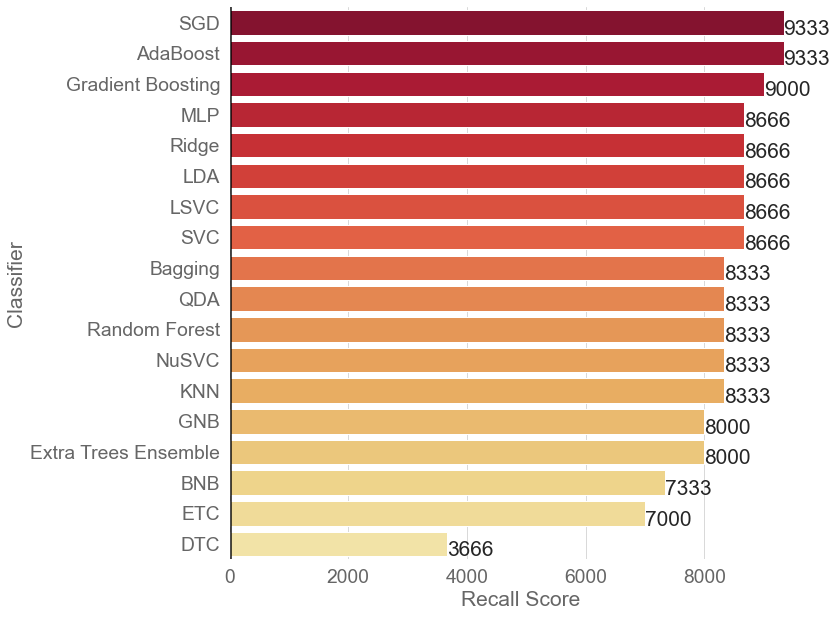

In [40]:
# Dictionary to PandasDataFrame
recall_scores = pd.DataFrame(recall_scores)

# Sort dataframe
recall_scores = recall_scores.sort_values(by = ["Recall Score"], ascending = False)

# Convert decimals to percentages
recall_scores[recall_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlOrRd", 20)[::-1]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

g = sns.barplot(x="Recall Score", y="Classifier", palette = palette,
            data = recall_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Show values
show_values_on_bars(g, h_v="h", space=0.4)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Recall Scores for Undersampled data Bar Plot of Undersampled Data.png", dpi = 1200)

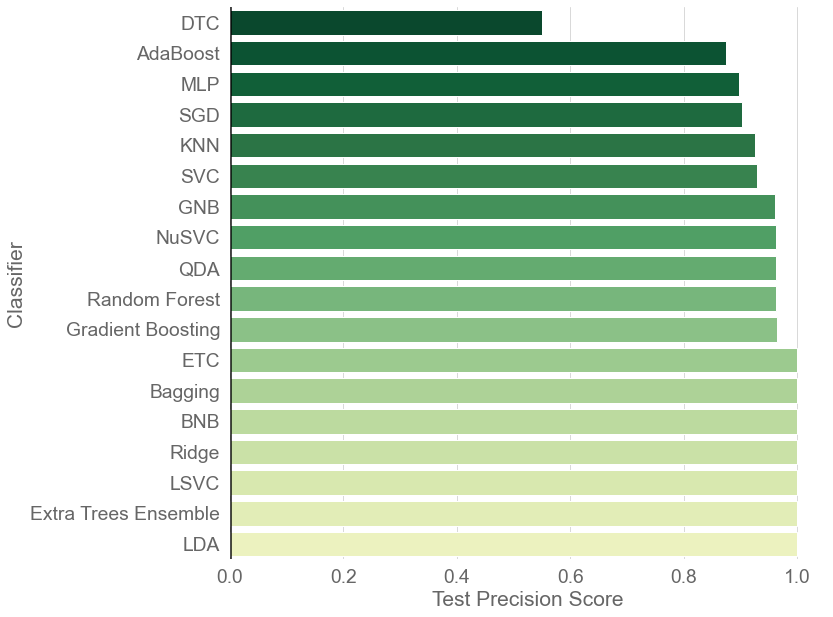

In [41]:
# False positive rate plot
fpr_scores = {
              "Classifier": [],
              "Test Precision Score": [],
              }

# Get fpr into dictionary
for classifier_label in results:
    fpr_scores.update({"Classifier": [classifier_label] + fpr_scores["Classifier"],
                       "Test Precision Score": [results[classifier_label]["Test Precision Score"]] + fpr_scores["Test Precision Score"]
                       })
    

# Dictionary to PandasDataFrame
fpr_scores = pd.DataFrame(fpr_scores)

# Sort dataframe
fpr_scores = fpr_scores.sort_values(by = ["Test Precision Score"])

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlGn", 20)[::-1]


# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="Test Precision Score", y="Classifier", palette = palette,
            data = fpr_scores)


# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Final Precision Score Bar Plot of Undersampled Data.png", dpi = 1200)

In [76]:
# Get recall scores into dictionary
from currency_converter import CurrencyConverter
c = CurrencyConverter()
eur = []
gbp = []
for classifier_label in results:
    # Classifier
    classifier = results[classifier_label]["Classifier"]
    
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Get the difference
    difference = np.abs(114*fn - 5*fp)
    pounds = c.convert(difference, 'EUR', 'GBP')
    eur.append(difference)
    gbp.append(pounds)
    
    print(f"{classifier_label} difference is {difference} euros.")
    print(f"{classifier_label} difference in pounds is {pounds} British pounds.")

LDA difference is 1819 euros.
LDA difference in pounds is 1659.43732 British pounds.
QDA difference is 1135 euros.
QDA difference in pounds is 1035.4378 British pounds.
AdaBoost difference is 654 euros.
AdaBoost difference in pounds is 596.63112 British pounds.
Bagging difference is 1254 euros.
Bagging difference in pounds is 1143.99912 British pounds.
Extra Trees Ensemble difference is 1368 euros.
Extra Trees Ensemble difference in pounds is 1247.99904 British pounds.
Gradient Boosting difference is 1021 euros.
Gradient Boosting difference in pounds is 931.43788 British pounds.
Random Forest difference is 1026 euros.
Random Forest difference in pounds is 935.99928 British pounds.
Ridge difference is 1819 euros.
Ridge difference in pounds is 1659.43732 British pounds.
SGD difference is 778 euros.
SGD difference in pounds is 709.75384 British pounds.
BNB difference is 1591 euros.
BNB difference in pounds is 1451.43748 British pounds.
GNB difference is 1363 euros.
GNB difference in pound

In [74]:
names = list(classifiers.keys())

In [79]:
Amt_lost_df = pd.DataFrame()
Amt_lost_df['Classifier'] = names
Amt_lost_df['Euros Lost'] = eur
Amt_lost_df['GBP Lost'] = gbp
Amt_lost_df

,Classifier,Euros Lost,GBP Lost
0,LDA,1819,1659.43732
1,QDA,1135,1035.43780
2,AdaBoost,654,596.63112
3,Bagging,1254,1143.99912
4,Extra Trees Ensemble,1368,1247.99904
5,Gradient Boosting,1021,931.43788
6,Random Forest,1026,935.99928
7,Ridge,1819,1659.43732
8,SGD,778,709.75384
9,BNB,1591,1451.43748


In [43]:
# Classifier
classifier = results["Extra Trees Ensemble"]["Classifier"]

# Make predictions
y_pred = classifier.predict(X_test)
    
# Get indices from test set
test_index = y_test.index

# Get indices of false positives and true positives in y_pred
fp_tp_index = test_index[y_pred == 1] 

# Get rows test set that corresponds to false positives and true positive
fp_tp = X_test.loc[fp_tp_index, :]

In [52]:
fp_tp['Class'] = y_test

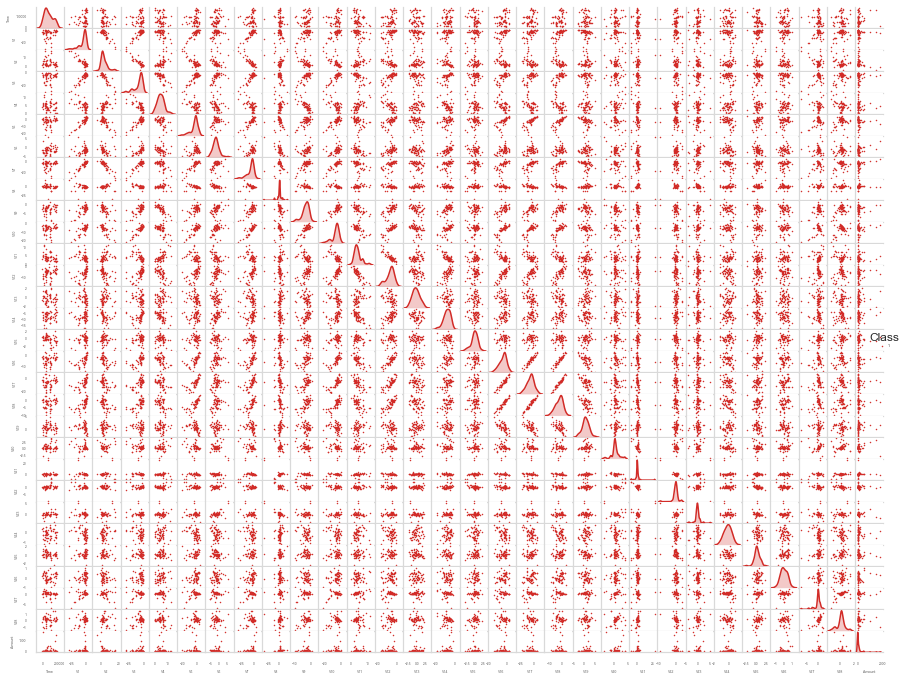

In [53]:
# Set graph style
sns.set(font_scale = 0.3)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4', 'axes.grid': False})

# Define color palette
palette = sns.color_palette("RdYlGn", 10)
palette = [palette[0], palette[-1]]

# Make graph
g = sns.pairplot(data = fp_tp, palette  = palette, 
                 plot_kws=dict(s=1, edgecolor= None, linewidth=0.5), hue = "Class")

# Set figure size
g.fig.set_size_inches(12,9)

# Save figure
g.savefig("FP TP Pair Plot OF Undersampled data.png", dpi = 1080)

In [86]:
recall_scores1 = {
              "Classifier": [],
              "Recall Score": [],
              "Precision Score": [],
                "AUC Score": [],
              }
for classifier_label in results:  
    recall_scores1.update({"Classifier": [classifier_label] + recall_scores1["Classifier"],
                       "Recall Score": [results[classifier_label]["Test Recall Score"]] + recall_scores1["Recall Score"],
                          "Precision Score": [results[classifier_label]["Test Precision Score"]] + recall_scores1["Precision Score"],
                           "AUC Score": [results[classifier_label]["Test AUC"]] + recall_scores1["AUC Score"]
                       })

In [87]:
# Dictionary to PandasDataFrame
scores = pd.DataFrame(recall_scores1)
scores

,Classifier,Recall Score,Precision Score,AUC Score
0,ETC,0.700000,1.000000,0.863636
1,DTC,0.366667,0.550000,0.487879
2,SVC,0.866667,0.928571,0.963636
3,NuSVC,0.833333,0.961538,0.951515
4,LSVC,0.866667,1.000000,0.977273
5,MLP,0.866667,0.896552,0.962121
6,KNN,0.833333,0.925926,0.871212
7,GNB,0.800000,0.960000,0.942424
8,BNB,0.733333,1.000000,0.925758
9,SGD,0.933333,0.903226,0.974242


In [89]:
# Set name of the classifiers as index labels
scores.set_index('Classifier', inplace=True)

In [92]:
fp_tp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
573,93888.0,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,...,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1.00,1
499,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1
588,93965.0,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,-4.988837,...,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,11.40,1
458,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
496,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
558,77202.0,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,...,-0.312863,-0.687874,-0.267003,-1.158480,0.271460,-0.155397,0.114328,0.101526,1.00,1
395,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
523,8090.0,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00,1


In [94]:
scores['Test Precision Score'] = fpr_scores['Test Precision Score']

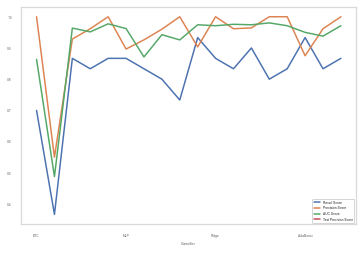

In [101]:
scores.plot()

In [ ]:
import pandas as pd
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


iplot({
     'data':
         [{'x': [0,1],
           'y': scores['AUC Score'],
           'name': col} for col in df.index[1:-1]],
           'layout':{'title':'AUC Plot'}}, show_link=False)
